# Model Training

### Import Data and Required Packages

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('Salary_Dataset.csv')

Show Top 5 Records

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,Bachelors,Software/Developer,5,90000,UK,White
1,28,Female,Masters,Data Analyst/Scientist,3,65000,USA,Hispanic
2,45,Male,PhD,Manager/Director/VP,15,150000,Canada,White
3,36,Female,Bachelors,Sales,7,60000,USA,Hispanic
4,52,Male,Masters,Manager/Director/VP,20,200000,USA,Asian


### Preparing X and Y variables

In [5]:
X = df.drop(columns=['Salary'],axis=1)

In [6]:
X.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,32,Male,Bachelors,Software/Developer,5,UK,White
1,28,Female,Masters,Data Analyst/Scientist,3,USA,Hispanic
2,45,Male,PhD,Manager/Director/VP,15,Canada,White
3,36,Female,Bachelors,Sales,7,USA,Hispanic
4,52,Male,Masters,Manager/Director/VP,20,USA,Asian


In [8]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Education Level' variable:  ",end=" ")
print(df['Education Level'].unique())

print("Categories in'Job Title' variable:",end=" " )
print(df['Job Title'].unique())

print("Categories in 'Country' variable:     ",end=" " )
print(df['Country'].unique())

print("Categories in 'Race' variable:     ",end=" " )
print(df['Race'].unique())

Categories in 'Gender' variable:      ['Male' 'Female' 'Other']
Categories in 'Education Level' variable:   ['Bachelors' 'Masters' 'PhD' 'High School']
Categories in'Job Title' variable: ['Software/Developer' 'Data Analyst/Scientist' 'Manager/Director/VP'
 'Sales' 'Marketing/Social Media' 'Customer Service/Receptionist' 'Other'
 'IT/Technical Support' 'Product/Designer' 'Financial/Accountant'
 'HR/Human Resources' 'Operations/Supply Chain']
Categories in 'Country' variable:      ['UK' 'USA' 'Canada' 'China' 'Australia']
Categories in 'Race' variable:      ['White' 'Hispanic' 'Asian' 'Korean' 'Chinese' 'Australian' 'Welsh'
 'African American' 'Mixed' 'Black']


In [9]:
y = df['Salary']

In [10]:
y

0        90000
1        65000
2       150000
3        60000
4       200000
         ...  
6693    200000
6694     50000
6695     55000
6696    140000
6697     35000
Name: Salary, Length: 6698, dtype: int64

In [11]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(6698, 36)

In [14]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5358, 36), (1340, 36))

In [15]:
y_train.shape

(5358,)

### Create an Evaluate Function to give all metrics after model Training

In [24]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 26530.9286
- Mean Absolute Error: 20632.2126
- R2 Score: 0.7459
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27005.6445
- Mean Absolute Error: 20788.6921
- R2 Score: 0.7442




i:\Projects\SalaryPredictionML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369983897932.3281, tolerance: 1484133856.7444344
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 26531.0071
- Mean Absolute Error: 20631.5852
- R2 Score: 0.7459
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27003.1624
- Mean Absolute Error: 20786.3811
- R2 Score: 0.7443


Ridge
Model performance for Training set
- Root Mean Squared Error: 26531.3667
- Mean Absolute Error: 20630.4560
- R2 Score: 0.7459
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27002.4336
- Mean Absolute Error: 20785.5447
- R2 Score: 0.7443


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 19102.8836
- Mean Absolute Error: 13205.9535
- R2 Score: 0.8683
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 24230.1849
- Mean Absolute Error: 17330.3939
- R2 Score: 0.7941


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 4370.0647
- Mean Absolute Error: 12

In [26]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.948113
7,CatBoosting Regressor,0.942584
6,XGBRegressor,0.942159
4,Decision Tree,0.930518
3,K-Neighbors Regressor,0.794105
8,AdaBoost Regressor,0.768156
2,Ridge,0.744295
1,Lasso,0.744282
0,Linear Regression,0.744235


### Random Forest Regressor

In [27]:
rfg = RandomForestRegressor()
rfg = rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.81


### Plot y_pred and y_test

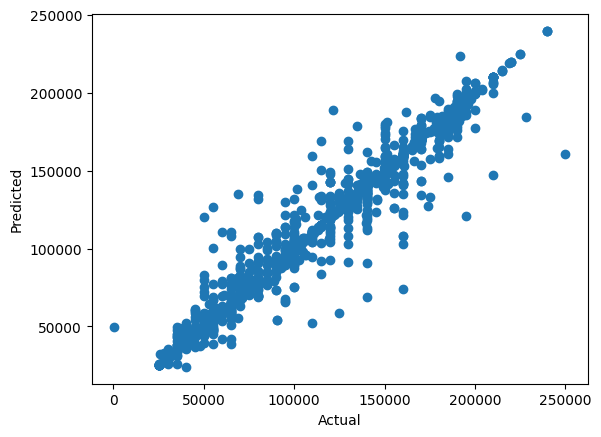

In [28]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

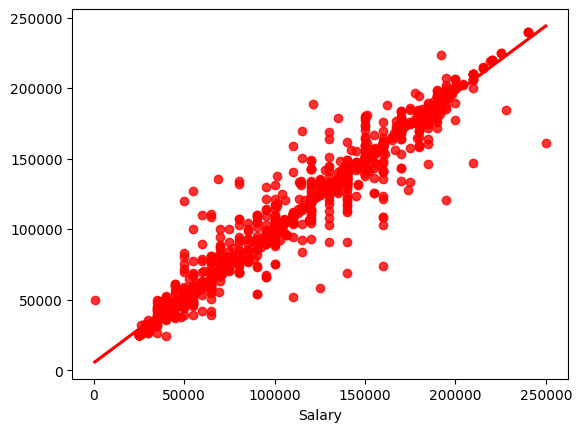

In [29]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [30]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1881,150000,149812.625000,187.375000
2627,75969,77322.170000,-1353.170000
496,100000,99550.000000,450.000000
5968,60000,59970.000000,30.000000
4104,80000,80375.000000,-375.000000
...,...,...,...
2827,73218,78418.440000,-5200.440000
6149,65000,61566.706349,3433.293651
4936,105000,105050.000000,-50.000000
135,55000,126886.480000,-71886.480000


## Hyperparameter Tunning

In [31]:
#defining the parameters for the grid search
parameters = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'max_features':['sqrt','log2',None],
              'n_estimators': [8,16,32,64,128,256]}

In [32]:
#creating the grid search object
grid_search = GridSearchCV(rfg,parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
#fit the grid search object to the training data
grid_search.fit(X_train,y_train)

In [ ]:
#print the best parameters
print(grid_search.best_params_)

{'criterion': 'absolute_error', 'max_features': None, 'n_estimators': 256}


In [ ]:
rfg = RandomForestRegressor(criterion ='absolute_error', n_estimators = 256,  random_state = 42)
rfg

RandomForestRegressor(criterion='absolute_error', n_estimators=256,
                      random_state=42)

In [42]:
#fitting the training data
rfg.fit(X_train,y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=256,
                      random_state=42)

In [43]:
#training accuracy
rfg.score(X_train, y_train)

0.9864431424833976

In [44]:
#predicting the salary of an employee
d_pred = rfg.predict(X_test)

In [45]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,150000,148671.839844
1,75969,79057.367188
2,100000,99824.218750
3,60000,59814.453125
4,80000,82441.406250
5,190000,194814.453125
6,72000,73400.390625
7,55000,56675.781250
8,195000,196904.296875
9,130000,131148.437500


## Conclusion from Model Training

Coming to the machine learning models, I have used regressor models - Linear Regression, Lasso, Ridge, K-Neighbors Regressor, Decision Tree, Random Forest Regressor, XGBRegressor, CatBoosting Regressor, AdaBoost Regressor for predicting the salary. The Random Forest Regressor has performed well with the accuracy of 94.8%